## An√°lisis de sentimientos

In [1]:
import pandas as pd
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
df= pd.read_csv('isla de maipo25-03-2020_15-35-43.csv',header=0, sep=',')
comentarios=df['comentario' ]

In [3]:
# Creamos una funci√≥n para limpiar los comentarios
import re
def cleanTxt(text):
     text = re.sub('@[A-Za-z0‚Äì9]+', '', text) #Removing @mentions
     text = re.sub('#', '', text) # Removing '#' hash tag
     text = re.sub('RT[\s]+', '', text) # Removing RT
     text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
     return text
    
# Limpiamos los comentarios
comentarios = comentarios.apply(cleanTxt)


# Mostramos los coemntarios limpios
comentarios

0                               Vickyta Galvez Cid backan
1       Carolina Valentina Santander Hola tio buenas t...
2       Antoniia Millaray Son unas nuevas guias o las ...
3       Angie Rubio Si porfabor coloquemolos las manit...
4       Rolando Gonz√°lez A solidarizar y cautelar la s...
                              ...                        
1512    Jessica Araos Ram√≠rez Hola, no se visualiza na...
1513                                   Bey Car Gracias!!!
1514    Jenny Carolina Rivera Cobarrubias Yo no veo na...
1515    Lorena Arias donde uno puede saber el correo d...
1516    Vera Vera Paola Estimados, las p√°ginas web sue...
Name: comentario, Length: 1517, dtype: object

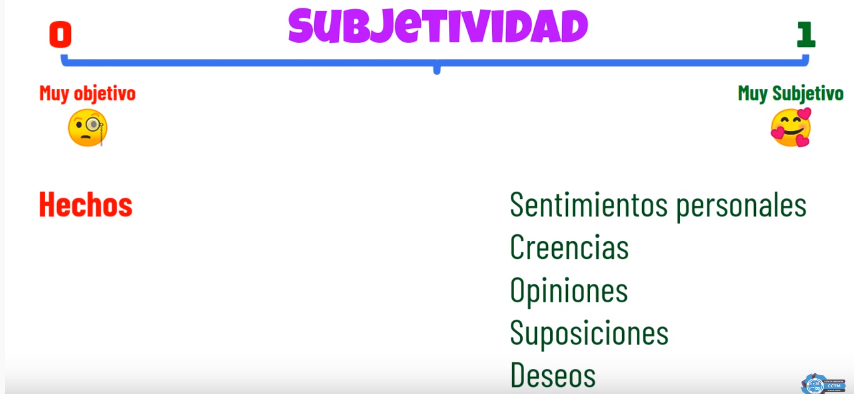

In [4]:
 ## La subjetividad 
from IPython.display import Image
Image(filename="img/subjetividad.png", width=800 , height=200) 

 

## La Polaridad
![title](img/Polaridad.png)  

Queremos agregar la subjetividad y polaridad de los comentarios al dataframe. Para hacer esto, crearemos dos funciones:

Una para obtener los comentarios llamados subjetividad (cu√°n subjetivo u obstinado es el texto, un puntaje de 0 es un hecho y un puntaje de +1 es en gran medida una opini√≥n) y
Otra para obtener el comentarios llamados Polarity (qu√© tan positivo o negativo es el texto, un puntaje de -1 es el puntaje negativo m√°s alto y un puntaje de +1 es el puntaje positivo m√°s alto). A continuaci√≥n, almacenaremos los resultados en dos columnas, una llamada "Subjetividad" y la otra llamada "Polaridad" y mostraremos los resultados.

In [5]:
df['polaridad']=df['comentario'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [6]:
#print(df['polaridad'].head(5))

In [7]:
df['Subjetividad']=df['comentario'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [8]:
print('polaridad')
print('valor maximo ',df['polaridad'].max())
print('valor minimo ',df['polaridad'].min())
print('valor medio ',df['polaridad'].mean())

polaridad
valor maximo  0.6510416666666665
valor minimo  -1.0
valor medio  0.004601323884860471


In [9]:
df[['comentario','polaridad','Subjetividad']]

comentario  polaridad  \
0                             Vickyta Galvez Cid backan        0.0   
1     Carolina Valentina Santander Hola tio buenas t...        0.0   
2     Antoniia Millaray Son unas nuevas guias o las ...        0.0   
3     Angie Rubio Si porfabor coloquemolos las manit...        0.0   
4     Rolando Gonz√°lez A solidarizar y cautelar la s...        0.0   
...                                                 ...        ...   
1512  Jessica Araos Ram√≠rez Hola, no se visualiza na...        0.0   
1513                                 Bey Car Gracias!!!        0.0   
1514  Jenny Carolina Rivera Cobarrubias Yo no veo na...        0.0   
1515  Lorena Arias donde uno puede saber el correo d...        0.0   
1516  Vera Vera Paola Estimados, las p√°ginas web sue...        0.0   

      Subjetividad  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.3  
...            ...  
1512           0.0  
1513           0.0  
1514           0.0  
1515           0.0  
1516           0.0  

[1517 rows x 3 columns]

Veamos qu√© tan bien se distribuyen los sentimientos. Una buena manera de lograr esta tarea es entender las palabras comunes trazando nubes de palabras. Una nube de palabras (tambi√©n conocida como nubes de texto o nubes de etiquetas) es una visualizaci√≥n, cuanto m√°s aparece una palabra espec√≠fica en el texto, m√°s grande y m√°s audaz aparece en la nube de palabras. Visualicemos todas las palabras en los datos usando el diagrama de nube de palabras. 

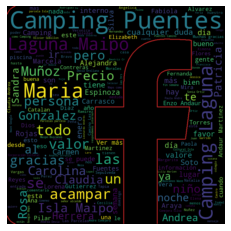

vickyta
galvez
cid
backan
carolina
valentina
santander
hola
tio
buenas
tardes
tio
carlos
vamos
a
regresar
al
colegio
o
qu√©
al√≥
en
las
casas
antoniia
millaray
son
unas
nuevas
guias
o
las
mismas
que
entregaron
el
lunes
angie
rubio
si
porfabor
coloquemolos
las
manitos
en
el
corazon
y
demonos
cuenta
que
ellos
tambien
tienen
familia

que
protejer
botemos
lo
justo
y
necesario
rolando
gonz√°lez
a
solidarizar
y
cautelar
la
salud
de
dicho
personal
tambi√©n
felicitaciones
por
la
iniciativa
nuestra
comunidad
a
ponerse
las
pilas
el
virus
no
hace
distingos
sandra
morales
si
publique
que
echen
cloro
para
de
infectar
las
bolsas
para
que
los
recolectores
de
protejan
eduardo
torres
se√±or
alcalde
en
lo.masias
camino
al
rio
estan
pasando
aolo
una
vez
a
la
semana.que
paso?
maria
teresa
saez
soto
ok
angie
rubio
si
porfabor
coloquemolos
las
manitos
en
el
corazon
y
demonos
cuenta
que
ellos
tambien
tienen
familia

que
protejer
botemos
lo
justo
y
necesario
rolando
gonz√°lez
a
solidarizar
y
cautelar
la
salud

ortega
up
teresa
orellana
millares
up
daniela
alejandra
poblete
up
gema
plaza
riquelme
ok
marjorie
consuelo
norambuena
gonzalez
up
veronica
reyes
up
olivia
bahamondes
up
rosa
pe√±a
muga
up
anita
vargas
up
marion
salinas
up
johanna
alvarez
moya
up
maribel
nilo
up
maribel
nilo
up
claudia
nordenflycht
cabrera
up
maribel
nilo
up
paloma
blanca
ojal√°
que
aparezca
luego
sana
y
salva
evelyn
diaz
up
valeria
velasquez
up
lissette
frantok
up
blanca
maribel
abarca
abarca
up
any
maldonado
reyes
up
astrid
gonsales
up
rosario
zu√±iga
up
marcela
paz
ortiz
aguilera
up
veronica
alarcon
up
alejandra
valenzuela
fuentes
up
nataly
romero
up
ojal√°
que
aparezcan
pronto
üôèüôèüôè
alejandra
valenzuela
fuentes
up
b√°rbara
guajardo
up
jaqueline
pardo
up
maria
rodriguez
up
myriam
adasme
up
miriam
sepulveda
up
urrutia
lisette
up
jesu
saldivia
up
damaret
consejera
up
emilio
pinto
curilef
up
daniela
soto
up
marisol
molina
ojala
que
la
encuentren
gloria
alvarez
up
gloria
alvarez
up
margarita
alvarez
mi√±o
up
paul

s√¥nia
arcine
up
lanita
mar√≠a
up
marinadelcarmen
reyes
up
maria
angelica
bravo
marcos
up
pilar
marchant
ojalas
dios
quiera
la
encuentren
bien
y
que
aparezca
me
imagino
la
angustia
de
su
familia
con
la
fe
y
la
esperanza
todo
se
puede
donizete
simone
souza
rodrigues
up
alejandra
espindola
up
alejandra
ortiz
up
rosa
leiva
c√°ceres
up
julia
gallardo
up
patricia
rodriguez
up
monica
toro
up
nancy
flores
up
bina
dias
up
teresa
leiva
iturrieta
up
carolina
maldonado
up
gina
villar
up
maida
gonzalez
up
maria
paulina
quiroga
mardones
up
vilma
patricia
acu√±a
hernandez
up
daniiela
camil
miran
up
faby
soto
up
cynthia
frutillita
up
marcela
belmar
up
maria
del
pilar
ruiz
up
ana
aburto
up
ana
aburto
up
ana
aburto
up
fabiola
haydee
alarcon
encina
up
ximena
bahamondes
up
andrea
mu√±oz
guzman
up
maria
palma
rojas
up
alejandro
contreras
tapia
up
sandra
llanos
ortiz
up
jose
luis
salazar
up
susana
julio
up
debora
silva
solis
up
paula
pimentel
ups
rosa
valdes
up
rosa
valdes
up
francisco
rubio
al√≥mejor
sufr

pasar√°n?
tamara
s
romero
https://www.google.com/.../comienza-la-vacunacion.../amp/
esto
pasa
en
santiago
filas
interminables
para
poder
vacunar
a
un
abuelito
ni√±o
o
quien
lo
necesite
ac√°
gracias
a
dios
eso
no
sucede
dej√©monos
de
a‚Ä¶ver
m√°s
yesenia
varela
que
fome
que
ande
cambiando
fecha
a
cada
rato
p√≥nganse
de
acuerdo
m√°s
encima
tengo
que
esperar
hasta
el
30
para
poder
vacunar
a
mis
hijo
ellos
son
cr√≥nico
pero
como
lo
van
a
vacunar
en
el
colegio
tengo
que
esperar
que
atroz
caro
esquivel
valdebenito
yesenia
varela
igual
puedes
ir
a
vacunarlo
directo
al
consultorio
mi
hijo
tambien
es
cr√≥nico
y
lo
lleve
hoy
al
maiten
no
habia
nada
de
gente
super
rapido
yesenia
varela
caro
esquivel
valdebenito
hola
hoy
fui
a
consultorio
que
esta
al
frente
del
reten
y
me
dijeron
que
no
por
que
en
el
colegio
lo
iban
a
vacunar
aunque
fueran
cr√≥nicos
caro
esquivel
valdebenito
yesenia
varela
llevalo
al
maiten
a
mi
no
me
hicieron
ni
un
problema
de
echo
habian
mas
ni√±os
vacunandose
y
0
drama
diego
al

mi
buen
camping
me
encant√≥
y
tiene
de
todo!!!
cinthya
afex
me
encanta
ir
es
un
lugar
excelente
matias
andres
duarte
flores
muy
buen
camping
el
otro
a√±o
volvemosü§ò
patricia
parra
si
dios
quiere
nos
vemos
el
pr√≥ximo
a√±o
andr√©s
urriola
v
ohhhh
y
en
este
tiempo
es
muy
agradable
acampar
ale
jandra
isla
pero
el
sector
de
camping
estar√°
cerrado
igual??
camping
los
puentes
ale
jandra
isla
si
ya
cerramos
temporada
patricia
alejandra
cort√©s
diaz
pero
como???
si
a√∫n
est√°
bueno
el
clima
quer√≠amos
ir
el
dgo
üò≠üò≠üò≠üò≠
margarita
del
carmen
martinez
cadenas
si
tan
pronto
toda
v√≠a
ase
mucho
calor
valeria
noem√≠
guerrero
troncoso
justo
queriamos
ir
este
fin
de
semana
(
jenny
chavez
c
y
yo
que
quer√≠a
ir
el
viernes...üò©üò©
sandra
iluffi
ya
no
est√°n
atendiendo????
barbara
ramirez
neira
ya
est√°
cerrado?
ximena
urra
donoso
chutaaaaa
tan
pronto
sandra
cariman
asta
cuando
tienen
abierto
vivhyta
mocha
disculpe
una
consulta
este
fin
de
semana
ya
no
abren?????
arcoiris
de
multiples
color

el
valor
del
camping?
puedo
hacer
uso
de
la
piscina?
camping
los
puentes
madeleine
mi√±o
camping
los
puentes
si
voy
acampar
puedo
usar
la
piscina?
camping
los
puentes
si
durantre
el
dia
pagando
el
valor
del
dia
tienes
acceso
a
las
piscinas
beatriz
zelaya
cristian
asenjo
villanueva
hola
camping
cuanto
sale
?
claudio
epul
elterco
y
las
caba√±as
de
igualmanera?
camping
los
puentes
claudio
epul
elterco
si
las
caba√±as
tambi√©n
lyshet
karhlos
hola
cuanto
pagan
los
ni√±os?
camping
los
puentes
hola
los
ni√±os
menores
de
5
a√±os
no
pagan
sobre
esas
edad
pagan
el
valor
de
la
entrada
general
maycol
kala
ke
lata
maycol
kala
el
19
va
estar
ceerradoo
pucha
keria
pasar
mi
cumple
aii
maria
isabel
sacinandana
maturana
silva
buuu
planeando
todo
la
semana
cin
la
familia
y
aparece
esto
(
fabiola
alejandra
zu√±iga
moreno
hola
cuanto
sale
acampar?
camping
los
puentes
fabiola
alejandra
zu√±iga
moreno
hola
sale
$3000
la
noche
por
persona
tamara
alejandra
hola
se
puede
acampar
desde
ma√±ana
hasta
el
1
de
ener

esta
abierto
camping
los
puentes
hola
eliana
el
lunes
17
est√°
abierto
eliana
brice√±o
camping
los
puentes
a
oki
gracias
de
all√°
somos
andres
cornejo
y
el
viernes
andres
cornejo
est√°
abierto
y
cuanto
sale
la
entrada
camping
los
puentes
lunes
a
viernes
$4.000
s√°bados
domingos
y
festivos
$6.000
p/p
(excepto
el
25
de
diciembre
y
1
enero)
acampar
$3.000
p/p
la
noche
vera
vera
paola
estimado
rector
estoy
muy
agradecida
por
el
apoyo
que
nos
est√°
brindando
pero
siento
que
nos
falta
la
retroalimentaci√≥n
despu√©s
de
realizar
las
actividades
la
mayor√≠a
de
las
tareas
enviadas
s√≥lo
se
deben
archivar
y
guardar
para
el
regreso
a
m√≠
pu‚Ä¶ver
m√°s
gipsa
diaz
rios
muchas
gracias

me
parece
un
buen
m√©todo
de
estudio
de
acuerdo
a
la
contingencia
que
estamos
viviendo
lo
importante
es
que
se
mantengan
activos
con
sus
materias
en
cada
asignatura

ya
tendr√°n
tiempo
de
retomar
el
ritmo
normal

lo
importante
ahora
es
cuidarse
y
cuidarnos
todos
‚Ä¶ver
m√°s
marcela
palma
buenos
d√≠as...concuerdo
con
an

In [10]:
# visualizaci√≥n de la nube de palabras
from wordcloud import WordCloud
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wine_mask = np.array(Image.open("fbmask.png "))
stopwords = set(STOPWORDS)
stopwords.update(["el", "que", "Los", "para", "la","de","en","del","es","yo","por","mi","con","si","su","hola","lo",])

allWords = ' '.join([comments for comments in df['comentario']]) 
wordCloud = WordCloud(stopwords=stopwords, width=800, height=500, random_state=21, max_font_size=110, mask=wine_mask,contour_width=3, contour_color='firebrick').generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show() 


texto = allWords
palabras = texto.split()
for palabra in palabras:
    print(palabra.strip('‚Äò‚Äô:;,.').lower())


## Crearemos una funci√≥n para calcular el an√°lisis negativo (-1), neutral (0) y positivo (+1) y agregue la informaci√≥n a una nueva columna llamada An√°lisis, luego muestre los resultados.

In [11]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'


df['Analysis'] = df['polaridad'].apply(getAnalysis)

# Show the dataframe
df[['comentario','polaridad','Subjetividad',"Analysis"]]

comentario  polaridad  \
0                             Vickyta Galvez Cid backan        0.0   
1     Carolina Valentina Santander Hola tio buenas t...        0.0   
2     Antoniia Millaray Son unas nuevas guias o las ...        0.0   
3     Angie Rubio Si porfabor coloquemolos las manit...        0.0   
4     Rolando Gonz√°lez A solidarizar y cautelar la s...        0.0   
...                                                 ...        ...   
1512  Jessica Araos Ram√≠rez Hola, no se visualiza na...        0.0   
1513                                 Bey Car Gracias!!!        0.0   
1514  Jenny Carolina Rivera Cobarrubias Yo no veo na...        0.0   
1515  Lorena Arias donde uno puede saber el correo d...        0.0   
1516  Vera Vera Paola Estimados, las p√°ginas web sue...        0.0   

      Subjetividad Analysis  
0              0.0  Neutral  
1              0.0  Neutral  
2              0.0  Neutral  
3              0.0  Neutral  
4              0.3  Neutral  
...            ...      ...  
1512           0.0  Neutral  
1513           0.0  Neutral  
1514           0.0  Neutral  
1515           0.0  Neutral  
1516           0.0  Neutral  

[1517 rows x 4 columns]

Imprimamos los comentarios positivos en orden ascendente. El comentario m√°s positivo es el comentario # 1.

In [12]:
# Imprimimos los tweets positivos: 
print('Desplegamos los Comentarios positivos:\n')
j=1
sortedDF = df.sort_values(by=['polaridad']) # Ordenamos los comentarios
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['comentario'][i])
    print()
    j= j+1

Desplegamos los Comentarios positivos:

1) Ingrid Zc Se agradece se√±or alcalde, a mi casa le llego a mi hija su mochila con v√≠veres, sea lo qu sea siempre es indispensable, aunque hay gente desagradecida que siempre quiere buscarle la quinta pata al gato ,pero es lo de menos, ya que en estos tiempos todo es bien recibido en los hogares que quiz√°s no tienen nada, pero tenga por seguro que si lo puedo compartir lo har√©

2) Beatriz Cr Roble Olivier Gobillon CUARENTENA GENERAL.. PARAR EL. PA√çS.. O SE USAR√ÅN MAS DE 5000 DE BOLSAS DE MUERTOS.

3) Gema Plaza Riquelme Ok

4) Rose Albornoz Delgado Up

5) Ingrid Zc Se agradece se√±or alcalde, a mi casa le llego a mi hija su mochila con v√≠veres, sea lo qu sea siempre es indispensable, aunque hay gente desagradecida que siempre quiere buscarle la quinta pata al gato ,pero es lo de menos, ya que en estos tiempos todo es bien recibido en los hogares que quiz√°s no tienen nada, pero tenga por seguro que si lo puedo compartir lo har√©

6) Caro 

Trace la polaridad y la subjetividad como un diagrama de dispersi√≥n. Parece que la mayor√≠a de los comentarios son positivos, ya que muchos de los puntos est√°n en el lado derecho de la polaridad en el valor 0.00.

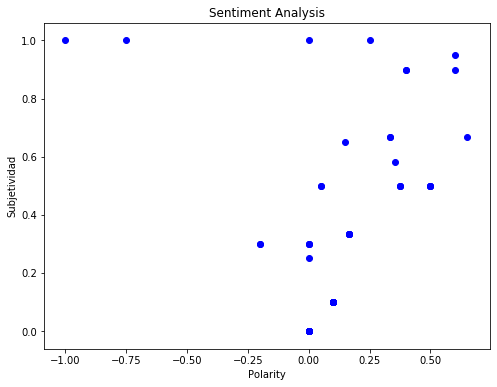

In [13]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["polaridad"][i], df["Subjetividad"][i], color='Blue') # plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjetividad') 
plt.show()

Imprimimos el porcentaje de comentarios positivos. Alrededor de 34/1517 de los comentarios se consideran comentarios positivos.

In [14]:
# Print el porcentaje de coementarios positivos
pcomentarios = df[df.Analysis == 'Positive']
pcomentarios = pcomentarios['comentario']
pcomentarios

round( (pcomentarios.shape[0] / df.shape[0]) * 100 , 1)

2.2

Imprime el porcentaje de comentarios negativos. Alrededor de 4/1517 comentarios se consideran comentarios negativos.

In [15]:
# Print el porcentaje de coementarios negativos
ncomentarios = df[df.Analysis == 'Negative']
ncomentarios = ncomentarios['comentario']
ncomentarios

round( (ncomentarios.shape[0] / df.shape[0]) * 100, 1)

0.3

Mostrar el valor cuenta. Ahora podemos ver que 34 comentarios son positivos,  1479 son neutrales y 4 son negativos.

In [16]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     1479
Positive      34
Negative       4
Name: Analysis, dtype: int64

Muestra visualmente el valor cuenta.

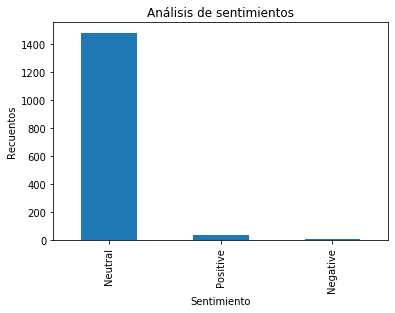

In [17]:
# Trazar y visualizar los recuentos
plt.title('An√°lisis de sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Recuentos')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [18]:
#keyword=input('Que concepto quieres buscar?: ')
#numberoComentarios=int(input('Ingresa el n√∫mero de Comentarios: '))

In [19]:
#comentarios = (df[df['comentario']], keyword ).items(numberoComentarios)

positive = 0
negative = 0
neutral = 0
polarity = 0 

def calculatePercentage(a,b):
    return 100*float(a)/float(b)

for comentario in comentarios:
    #print(comentario)
    myAnalysis=textblob.TextBlob(comentario)
    polarity += myAnalysis.sentiment.polarity
    if myAnalysis.sentiment.polarity ==0:
        neutral+=1
    elif myAnalysis.sentiment.polarity > 0.00:
        positive+=1
    elif myAnalysis.sentiment.polarity < 0.00:
        negative+=1

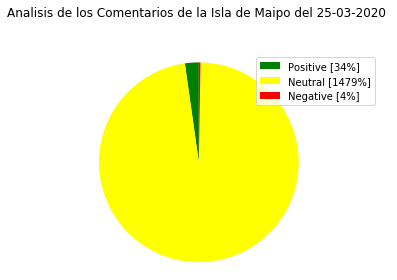

In [20]:
labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
sizes=[positive,neutral,negative]
colors=['green','yellow','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title('Analisis de los Comentarios de la Isla de Maipo del 25-03-2020 \n \n')
plt.axis('equal')
plt.tight_layout()
plt.show()